In [323]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_error,root_mean_squared_error
import os 

In [324]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [325]:
df_train.set_index('Id',inplace=True)
df_test.set_index('Id',inplace=True)

In [326]:
df_train.shape

(1460, 80)

In [327]:
df_test.shape

(1459, 79)

In [328]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [329]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [330]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [331]:
df_train.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

Skewness of sales price 1.8828757597682129


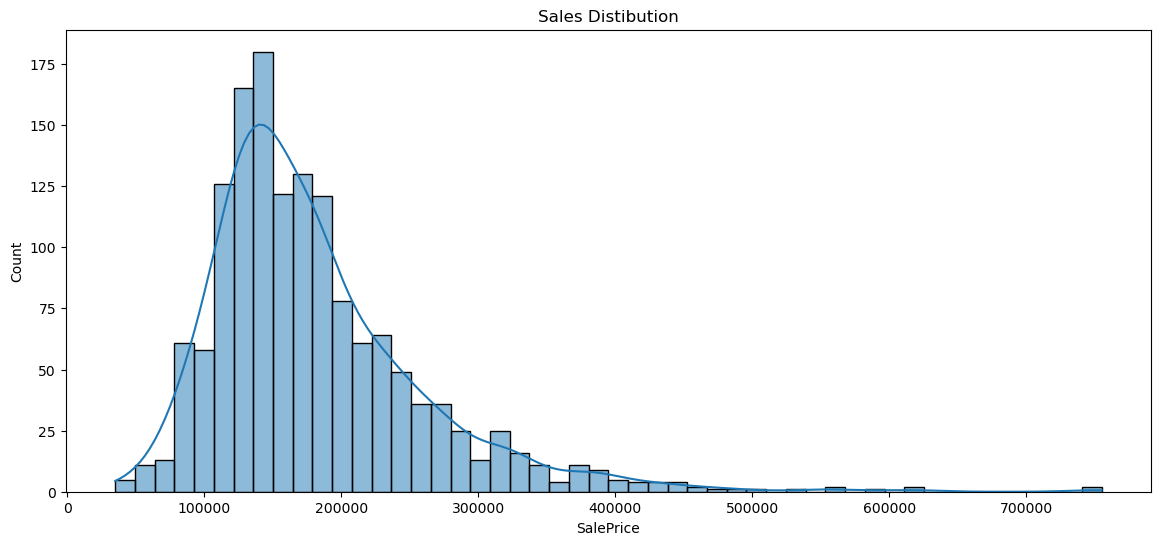

In [332]:
plt.figure(figsize=(14,6))
sns.histplot(df_train['SalePrice'],kde=True,bins=50)
plt.title("Sales Distibution")

print("Skewness of sales price " + f'{df_train['SalePrice'].skew()}')

Skewness of sales price 0.12134661989685333


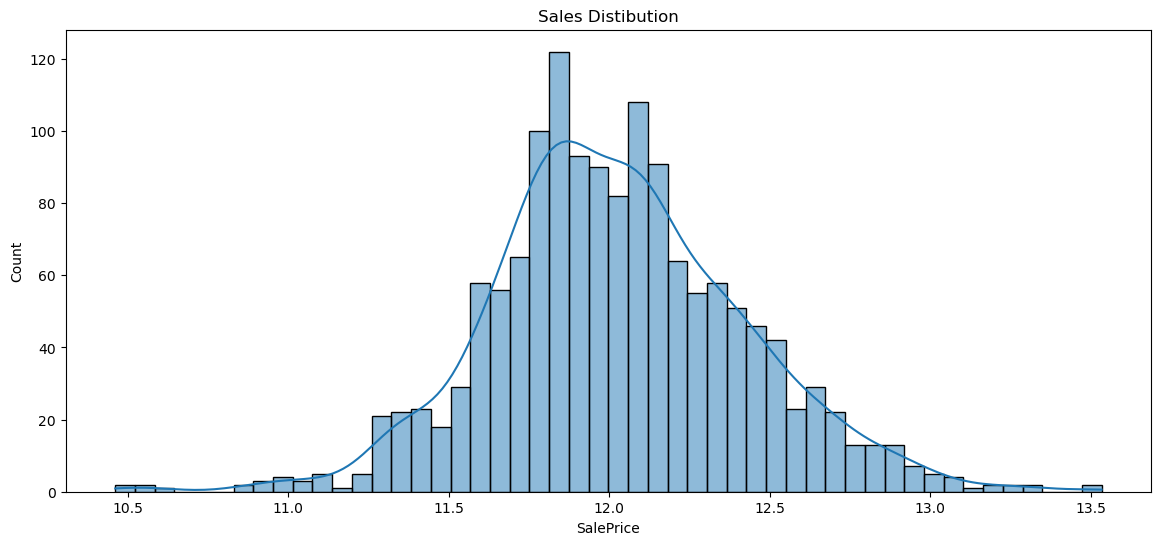

In [333]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])
plt.figure(figsize=(14,6))
sns.histplot(df_train['SalePrice'],kde=True,bins=50)
plt.title("Sales Distibution")

print("Skewness of sales price " + f'{df_train['SalePrice'].skew()}')

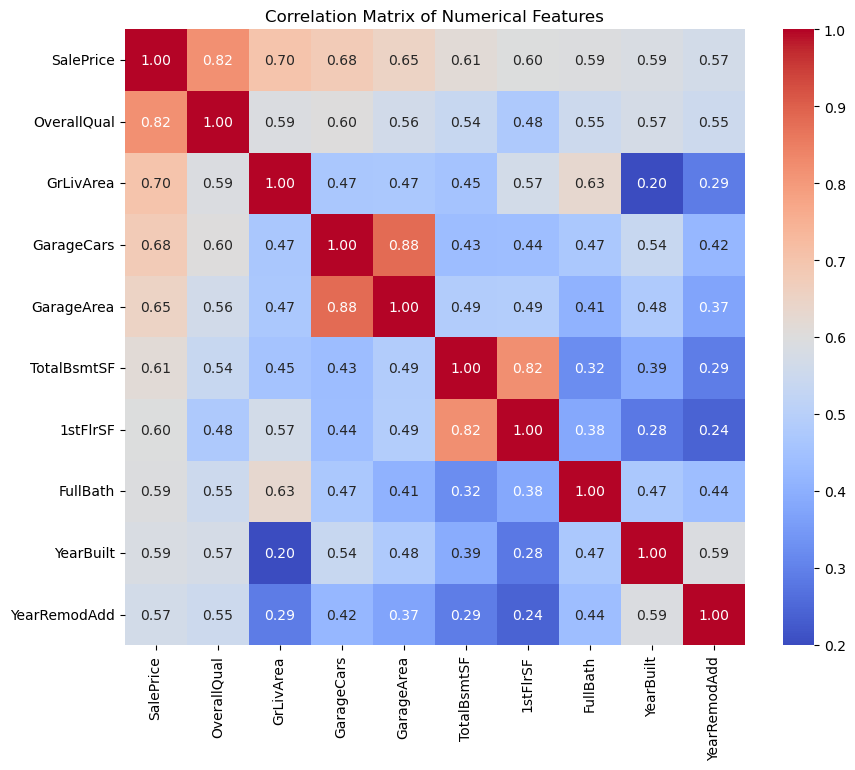

In [334]:
plt.figure(figsize=(10, 8))
corrmat = df_train.corr(numeric_only=True)
top_corr_features = corrmat.nlargest(10,'SalePrice')['SalePrice'].index
top_corr_matrix = df_train[top_corr_features].corr()
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [335]:
all_data = pd.concat((df_train.loc[:,:'SaleCondition'],
                      df_test.loc[:,:'SaleCondition']))

In [336]:
all_data.shape

(2919, 79)

In [337]:
missing_data = all_data.isna().sum().sort_values(ascending=False)
missing_values= missing_data[missing_data>0]

In [338]:
print(missing_values.shape)
print(missing_values)

(34,)
PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
BsmtFullBath       2
Functional         2
TotalBsmtSF        1
BsmtFinSF1         1
SaleType           1
BsmtFinSF2         1
GarageCars         1
Exterior2nd        1
Exterior1st        1
GarageArea         1
KitchenQual        1
BsmtUnfSF          1
Electrical         1
dtype: int64


In [339]:
numerical_cols = ['MasVnrArea' ,'MSZoning','BsmtHalfBath','Utilities','BsmtFullBath','Functional','TotalBsmtSF',      
'BsmtFinSF1','SaleType','BsmtFinSF2','GarageCars','Exterior2nd','Exterior1st','GarageArea','KitchenQual'        
'BsmtUnfSF','Electrical']

for col in numerical_cols:
    if col in all_data.columns:
        all_data[col] = all_data[col].fillna(0)

In [340]:
all_data['LotFrontage'].value_counts()

LotFrontage
60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
        ... 
152.0      1
138.0      1
182.0      1
168.0      1
133.0      1
Name: count, Length: 128, dtype: int64

In [341]:
if 'LotFrontage' in all_data and all_data['LotFrontage'].isna().any():
    all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x : x.fillna(x.median()))

In [342]:
all_data['Alley'].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [343]:
categorical_cols = ['Alley','Fence','MiscFeature','PoolQC' 
'MasVnrType','FireplaceQu','GarageFinish',    
'GarageQual','GarageCond''GarageType',        
'BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1']
for col in categorical_cols:
    if col in all_data.columns:
        all_data[col] = all_data[col].fillna('None')

In [344]:
for col in ['Exterior2nd','Utilities','Functional','MSZoning','Exterior1st','KitchenQual','Electrical'] :
    if col in all_data.columns:
        all_data[col] = all_data[col].fillna(all_data[col].mode())

In [345]:
all_data['GarageYrBlt'].isna().sum()

159

In [346]:
if 'GarageYrBlt' in all_data:
    all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(0)

In [347]:
all_data.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

In [348]:
categorical_cols = all_data.select_dtypes(include=['object']).columns

dummies = pd.get_dummies(all_data[categorical_cols], prefix=None, drop_first=True)
all_data = all_data.drop(columns=categorical_cols)
all_data = pd.concat([all_data, dummies], axis=1)

In [349]:
X = all_data[:len(df_train)]
y = df_train['SalePrice']
X_test_final = all_data[len(df_train):]

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [350]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_final_scaled = scaler.transform(X_test_final)

In [351]:
reg = LinearRegression()

In [352]:
reg.fit(X_train_scaled,y_train)

LinearRegression()

In [353]:
y_pred = reg.predict(X_val_scaled)

In [354]:
print(root_mean_squared_error(y_pred,y_val))
print(mean_absolute_error(y_pred,y_val))
print(mean_squared_error(y_pred,y_val))

62459928185.72012
4683258703.512708
3.901242628965315e+21


In [355]:
from xgboost import XGBRegressor

model = XGBRegressor()

In [356]:
model.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [357]:
y_pred = model.predict(X_val_scaled)

In [358]:
print(root_mean_squared_error(y_pred,y_val))
print(mean_absolute_error(y_pred,y_val))
print(mean_squared_error(y_pred,y_val))

0.1487771658924172
0.09761587449617437
0.022134645090979833


In [359]:
test_preds = model.predict(X_test_final_scaled) 

In [360]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

xgb_model = xgb.XGBRegressor(random_state=42)

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [500, 1000],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best score:", -grid.best_score_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}
Best score: 0.12481486670867618


In [361]:
best_params = {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}
best_xgb = xgb.XGBRegressor(
    **best_params,
    objective='reg:squarederror',  # for regression
    random_state=42
)

In [362]:
best_xgb.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [363]:
preds = best_xgb.predict(X_test_final_scaled)

In [364]:
test_d = pd.read_csv("test.csv")
submission = pd.DataFrame({
    "Id": test_d["Id"],   
    "SalePrice": preds  
})
submission.to_csv("submission.csv", index=False)